## Evaluation

### VOC 2007:

#### EfficientDet D0 (100 epochs/lr=1e-3 finetuning):

| **Loss**         | **IoU50** | **IoU75** | **IoU50:95** | **PIoU50** | **PIoU75** | **PIoU50:95** |
| ---------------- | --------- | --------- | ------------ | ---------- | ---------- | ------------- |
| PIoU L3->2xL1    | 0.7261    | 0.4424    | 0.4260       | 0.7670     | 0.6415     | 0.5676        |
| GIoU             | 0.7045    | 0.4396    | 0.4223       | 0.7426     | 0.6212     | 0.5533        |
| DIoU             | 0.7007    | 0.4474    | 0.4264       | 0.7352     | 0.6226     | 0.5531        |
| CIoU             | XXXXXX    | XXXXXX    | XXXXXX       | XXXXXX     | XXXXXX     | XXXXXX        |
| Smooth L1        | 0.7020    | 0.4202    | 0.4072       | 0.7409     | 0.6126     | 0.5449        |

#### EfficientDet D0 (100 epochs finetuning):

| **Loss**         | **IoU50** | **IoU75** | **IoU50:95** | **PIoU50** | **PIoU75** | **PIoU50:95** |
| ---------------- | --------- | --------- | ------------ | ---------- | ---------- | ------------- |
| *lr=1e-4*        |           |           |              |            |            |               |
| Smooth L1        | 0.7207    | 0.3132    | 0.3479       | 0.7378     | 0.5816     | 0.5072        |
| PIoU L1          | 0.7186    | 0.3196    | 0.3508       | 0.7393     | 0.5768     | 0.5074        |
| PIoU L2          | 0.7043    | 0.3090    | 0.3443       | 0.7305     | 0.5722     | 0.5003        |
| PIoU L3          | 0.6992    | 0.3033    | 0.3388       | 0.7271     | 0.5679     | 0.4959        |
| PIoU L1+L3       | 0.6665    | 0.2905    | 0.3319       | 0.7210     | 0.5606     | 0.4900        |
| GIoU             | 0.7257    | 0.3481    | 0.3672       | 0.7405     | 0.5874     | 0.5169        |
| *lr=1e-3*        |           |           |              |            |            |               |
| PIoU L3->L1      | 0.6986    | 0.4109    | 0.3999       | 0.7423     | 0.6075     | 0.5399        |
| PIoU L1          | 0.6651    | 0.3711    | 0.3714       | 0.7095     | 0.5811     | 0.5101        |
| 2x PIoU L1       | 0.6833    | 0.3940    | 0.3927       | 0.7242     | 0.5988     | 0.5273        |
| PIoU L3¹->2xL1   | 0.7009    | 0.4141    | 0.4043       | 0.7428     | 0.6160     | 0.5442        |
| PIoU 20xL3²>2xL1 | 0.7209    | 0.4246    | 0.4159       | 0.7634     | 0.6379     | 0.5606        |
| PIoU L3²->20xL2  | 0.7222    | 0.4341    | 0.4209       | 0.7596     | 0.6368     | 0.5624        |
| PIoU L3->4xL1    | 0.7224    | 0.4393    | 0.4240       | 0.7606     | 0.6358     | 0.5637        |
| 2XGIoU *(use?)*  | 0.7066    | 0.4611    | 0.4358       | 0.7418     | 0.6245     | 0.5602        |
| *250 epochs*     |           |           |              |            |            |               |
| PIoU L3²->2xL1   | 0.7248    | 0.4393    | 0.4250       | 0.7648     | 0.6457     | 0.5658        |
| PIoU L3->Smooth  | 0.7192    | 0.4267    | 0.4150       | 0.7626     | 0.6370     | 0.5612        |
| 2xGIoU           | 0.7020    | 0.4678    | 0.4362       | 0.7385     | 0.6204     | 0.5589        |

¹ started training with L3

² started training with L3 (after freezed a&b in the first epochs)

#### EfficientDet D1 (150 epochs finetuning):

| **Loss**     | **IoU50** | **IoU75** | **IoU50:95** | **PIoU50** | **PIoU75** | **PIoU50:95** |
| -----------  | --------- | --------- | ------------ | ---------- | ---------- | ------------- |
| Smooth L1    | 0.7364    | 0.4640    | 0.4410       | 0.7742     | 0.6549     | 0.5781        |
| GIoU         | 0.7237    | 0.4866    | 0.4534       | 0.7583     | 0.6422     | 0.5772        |
| PIoU L3->L1¹ | 0.7071    | 0.4419    | 0.4241       | 0.7438     | 0.6320     | 0.5590        |

¹trained 59 epoch and reached nan values

### VOC 2007 + 2012:

| **Loss**   | **IoU50** | **IoU75** | **IoU50:95** | **PIoU50** | **PIoU75** | **PIoU50:95** |
| ---------- | --------- | --------- | ------------ | ---------- | ---------- | ------------- |
| Smooth L1  | XXXXXX    | XXXXXX    | XXXXXX       | XXXXXX     | XXXXXX     | XXXXXX        |
| PIoU L1    | XXXXXX    | XXXXXX    | XXXXXX       | XXXXXX     | XXXXXX     | XXXXXX        |
| GIoU       | XXXXXX    | XXXXXX    | XXXXXX       | XXXXXX     | XXXXXX     | XXXXXX        |

In [1]:
from eval.common import evaluate, evaluate_mAP
from generators.pascal import PascalVocGenerator
from model import efficientdet
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
phi = 0
weighted_bifpn = False
common_args = {
    'batch_size': 1,
    'phi': phi,
}
test_generator = PascalVocGenerator(
    '/datasets/dataset/VOCdevkit/VOC2007',
    'test',
    shuffle_groups=False,
    skip_truncated=False,
    skip_difficult=True,
    **common_args
)

In [9]:
model_path = 'checkpoints/voc_diou_finetuned/pascal.h5'
input_shape = (test_generator.image_size, test_generator.image_size)
anchors = test_generator.anchors
num_classes = test_generator.num_classes()
model, prediction_model = efficientdet(phi=phi, num_classes=num_classes, weighted_bifpn=weighted_bifpn)
prediction_model.load_weights(model_path, by_name=True)

In [10]:
average_precisions = evaluate_mAP(test_generator, prediction_model, method='iou', visualize=False)

# compute per class average precision
total_instances = []
precisions = []
for label, (average_precision, num_annotations) in average_precisions.items():
    print('{:.0f} instances of class'.format(num_annotations), test_generator.label_to_name(label),
          'with average precision: {:.4f}'.format(average_precision))
    total_instances.append(num_annotations)
    precisions.append(average_precision)
mean_ap = sum(precisions) / sum(x > 0 for x in total_instances)
print('mAP0.5:0.95 = {:.4f}'.format(mean_ap))

Running network: 100% (4952 of 4952) |###| Elapsed Time: 0:02:38 Time:  0:02:38
Parsing annotations: 100% (4952 of 4952) || Elapsed Time: 0:00:02 Time:  0:00:02
Evaluating threshold 0.50: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.55:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.50 = 0.7007


Evaluating threshold 0.55: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.60:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.55 = 0.6765


Evaluating threshold 0.60: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.65:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.60 = 0.6405


Evaluating threshold 0.65: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.70:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.65 = 0.5937


Evaluating threshold 0.70: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.75:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.70 = 0.5303


Evaluating threshold 0.75: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.80:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.75 = 0.4474


Evaluating threshold 0.80: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.85:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.80 = 0.3471


Evaluating threshold 0.85: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.90:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.85 = 0.2243


Evaluating threshold 0.90: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.95:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.90 = 0.0931


Evaluating threshold 0.95: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04


AP0.95 = 0.0106
num_fp=868864.0, num_tp=63426.0
285 instances of class aeroplane with average precision: 0.4549
337 instances of class bicycle with average precision: 0.5216
459 instances of class bird with average precision: 0.3779
263 instances of class boat with average precision: 0.2879
469 instances of class bottle with average precision: 0.2347
213 instances of class bus with average precision: 0.5705
1201 instances of class car with average precision: 0.5551
358 instances of class cat with average precision: 0.5635
756 instances of class chair with average precision: 0.2423
244 instances of class cow with average precision: 0.4370
206 instances of class diningtable with average precision: 0.3875
489 instances of class dog with average precision: 0.4963
348 instances of class horse with average precision: 0.5502
325 instances of class motorbike with average precision: 0.4708
4528 instances of class person with average precision: 0.4182
480 instances of class pottedplant with aver

In [11]:
average_precisions = evaluate_mAP(test_generator, prediction_model, method='piou', visualize=False)

# compute per class average precision
total_instances = []
precisions = []
for label, (average_precision, num_annotations) in average_precisions.items():
    print('{:.0f} instances of class'.format(num_annotations), test_generator.label_to_name(label),
          'with average precision: {:.4f}'.format(average_precision))
    total_instances.append(num_annotations)
    precisions.append(average_precision)
mean_ap = sum(precisions) / sum(x > 0 for x in total_instances)
print('mAP0.5:0.95 = {:.4f}'.format(mean_ap))

Running network: 100% (4952 of 4952) |###| Elapsed Time: 0:02:33 Time:  0:02:33
Parsing annotations: 100% (4952 of 4952) || Elapsed Time: 0:00:01 Time:  0:00:01
Evaluating threshold 0.50: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.55:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.50 = 0.7352


Evaluating threshold 0.55: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.60:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.55 = 0.7250


Evaluating threshold 0.60: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.65:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.60 = 0.7127


Evaluating threshold 0.65: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.70:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.65 = 0.6927


Evaluating threshold 0.70: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.75:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.70 = 0.6651


Evaluating threshold 0.75: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.80:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.75 = 0.6226


Evaluating threshold 0.80: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.85:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.80 = 0.5499


Evaluating threshold 0.85: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.90:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.85 = 0.4523


Evaluating threshold 0.90: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04
Evaluating threshold 0.95:   5% (1 of 20) || Elapsed Time: 0:00:00 ETA:  00:00:00

AP0.90 = 0.2926


Evaluating threshold 0.95: 100% (20 of 20) || Elapsed Time: 0:00:04 Time:  0:00:04


AP0.95 = 0.0830
num_fp=850870.0, num_tp=81420.0
285 instances of class aeroplane with average precision: 0.6029
337 instances of class bicycle with average precision: 0.6657
459 instances of class bird with average precision: 0.5162
263 instances of class boat with average precision: 0.4146
469 instances of class bottle with average precision: 0.3457
213 instances of class bus with average precision: 0.6646
1201 instances of class car with average precision: 0.6850
358 instances of class cat with average precision: 0.6810
756 instances of class chair with average precision: 0.3536
244 instances of class cow with average precision: 0.5657
206 instances of class diningtable with average precision: 0.5115
489 instances of class dog with average precision: 0.6301
348 instances of class horse with average precision: 0.6814
325 instances of class motorbike with average precision: 0.6126
4528 instances of class person with average precision: 0.5702
480 instances of class pottedplant with aver

## Visualize training

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [10]:
def get_df(path_training, sufix='finetuned'):
    # open training info
    path_csv = glob(os.path.join(path_training+'*', '*.csv'), recursive=True)
    dfs = {'finetuned' if sufix in path else 'freezed': pd.read_csv(path) for path in path_csv}

    # freezed epochs
    freeze_epochs = max(dfs['freezed']['epoch'])
    dfs['finetuned']['epoch'] += freeze_epochs

    # join infos
    df = pd.concat([dfs['freezed'], dfs['finetuned']])
    df['epoch'] += 1
    return df

In [11]:
def plot_metric(name, metric_name, df, diff=False):
    plt.figure(figsize=(10,5))
    plt.grid('on')
    if diff:
        from scipy.signal import savgol_filter
        adj = lambda x: savgol_filter(x[50:], 51, 3)
        epochs = df['epoch'][51:]
        plt.plot(epochs, adj(np.diff(df[f'val_{metric_name}loss'])),\
                 epochs, adj(np.diff(df[f'{metric_name}loss'])), linestyle='dashed')
        plt.legend(['val', 'train'])
        
    else:
        plt.plot(df['epoch'], df[f'val_{metric_name}loss'], df['epoch'], df[f'{metric_name}loss'])
        plt.axvline(x=50, color='r', linestyle='--')
        plt.legend(['val', 'train'])
    plt.xlabel('epoch')
    plt.ylabel(f'{metric_name}loss')
    plt.title(name)
    
    plt.savefig(f'saves/{metric_name}{name}.png')

In [12]:
df = pd.read_csv('checkpoints/voc_piou_initl3_20xl2_freezed_finetuned/pascal_history.csv')
df

,epoch,classification_loss,loss,lr,regression_loss,val_classification_loss,val_loss,val_regression_loss
0,0,0.370468,0.883923,0.001000,0.513456,0.361865,0.844066,0.482202
1,1,0.332912,0.803541,0.001000,0.470629,0.361635,0.835744,0.474108
2,2,0.308759,0.749079,0.001000,0.440320,0.311008,0.734975,0.423967
3,3,0.291625,0.704847,0.001000,0.413222,0.289885,0.697887,0.408002
4,4,0.277554,0.669286,0.001000,0.391732,0.276920,0.652144,0.375224
...,...,...,...,...,...,...,...,...
90,90,0.026761,0.093317,0.000134,0.066556,0.036735,0.117932,0.081197
91,91,0.027164,0.094728,0.000134,0.067563,0.036092,0.116027,0.079935
92,92,0.026941,0.094248,0.000134,0.067308,0.036227,0.117130,0.080903
93,93,0.026292,0.092329,0.000134,0.066037,0.037222,0.117854,0.080631


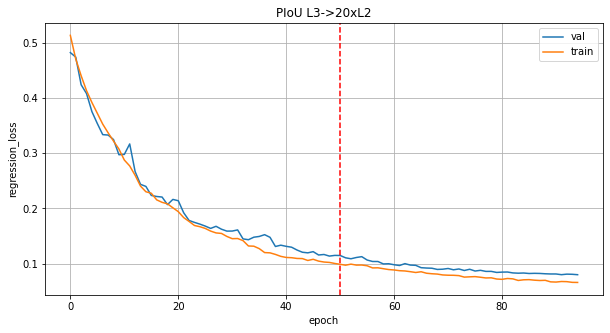

In [13]:
plot_metric('PIoU L3->20xL2', 'regression_', df)

In [4]:
df_l1 = get_df('checkpoints/voc_l1')

df_giou = get_df('checkpoints/voc_giou')

df_pioul1 = get_df('checkpoints/voc_piou_l1')
df_pioul3 = get_df('checkpoints/voc_piou_l3')

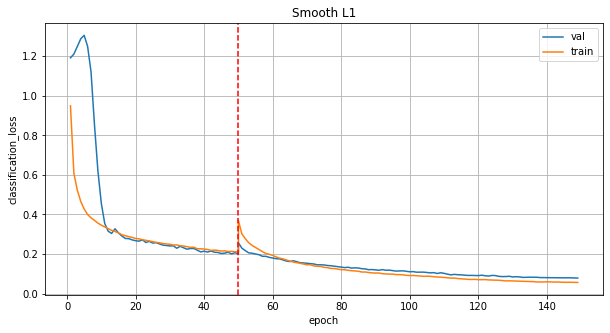

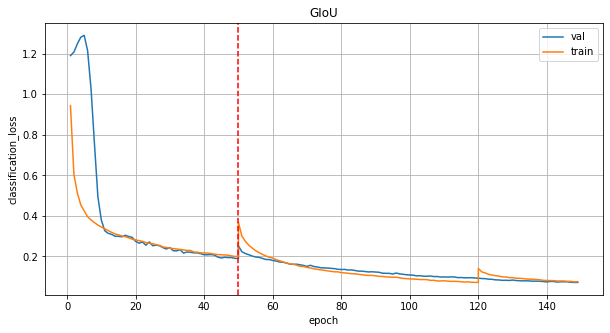

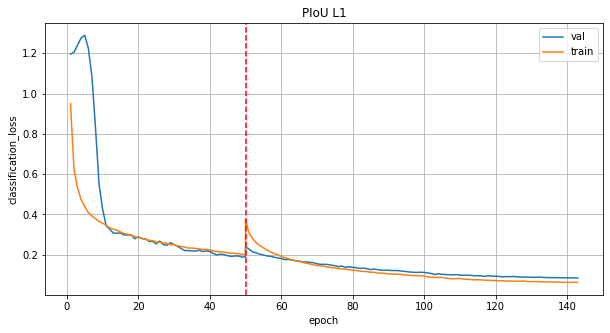

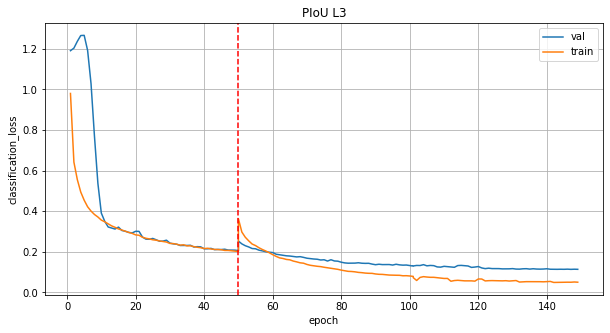

In [5]:
plot_metric('Smooth L1', 'classification_', df_l1)
plot_metric('GIoU', 'classification_', df_giou)
plot_metric('PIoU L1', 'classification_', df_pioul1)
plot_metric('PIoU L3', 'classification_', df_pioul3)

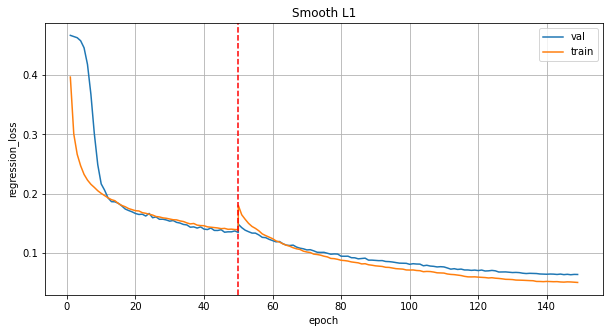

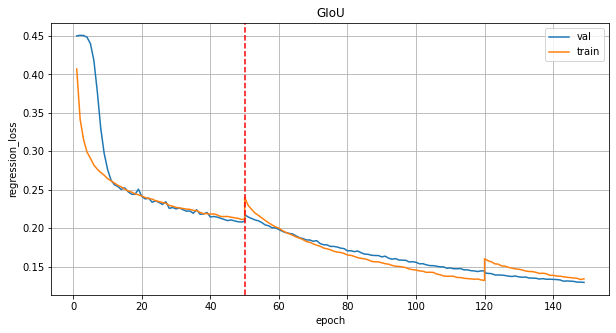

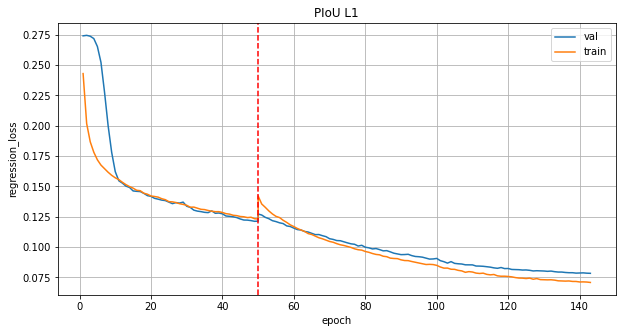

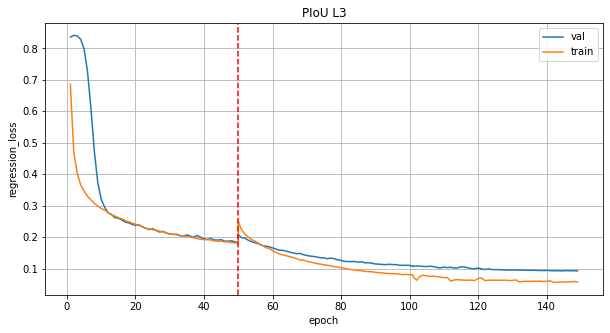

In [6]:
plot_metric('Smooth L1', 'regression_', df_l1)
plot_metric('GIoU', 'regression_', df_giou)
plot_metric('PIoU L1', 'regression_', df_pioul1)
plot_metric('PIoU L3', 'regression_', df_pioul3)

/usr/local/lib/python3.6/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/usr/local/lib/python3.6/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/usr/local/lib/python3.6/dist-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]

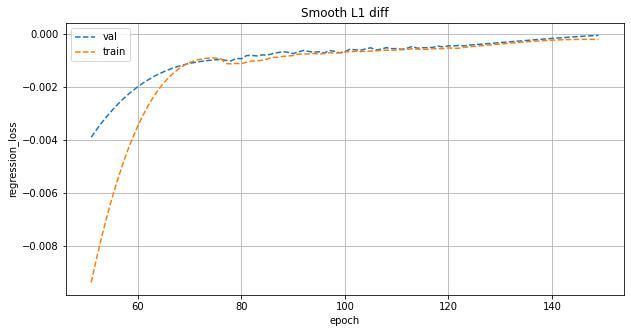

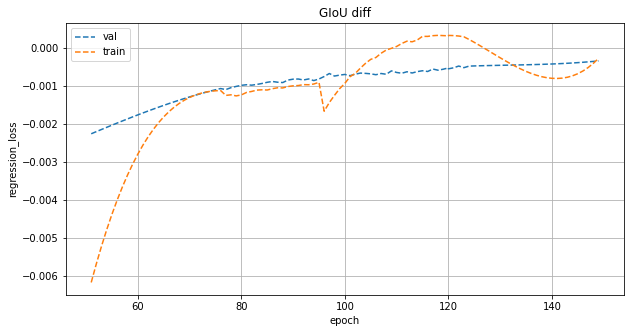

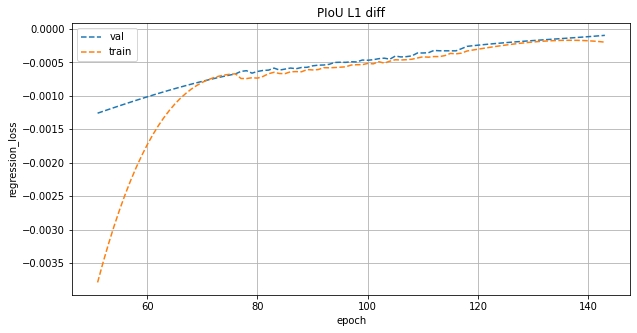

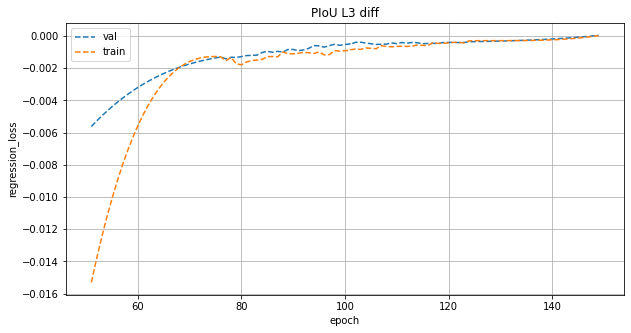

In [7]:
plot_metric('Smooth L1 diff', 'regression_', df_l1, diff=True)
plot_metric('GIoU diff', 'regression_', df_giou, diff=True)
plot_metric('PIoU L1 diff', 'regression_', df_pioul1, diff=True)
plot_metric('PIoU L3 diff', 'regression_', df_pioul3, diff=True)